# Linear Regression algorithm

Importing all neccesary libraries:

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import math
from IPython.display import HTML

Generating points (x, y):

In [2]:
np.random.seed()
x = np.arange(-10, 10, .1)
k = round(np.random.uniform(-2, 2), 2)
b = round(np.random.uniform(-2, 2), 2)
mean = round(np.random.uniform(-2, 2), 2)
deviation = round(np.random.uniform(1, 4), 2)
y = [k * i + b + np.random.normal(mean, deviation) for i in x]
print("y={0}x".format(k) + "{:+}+z".format(b) + ", where z ~ N({0}, {1})".format(mean, deviation))

y=-0.87x-1.45+z, where z ~ N(-1.51, 2.28)


Drawing generated points:

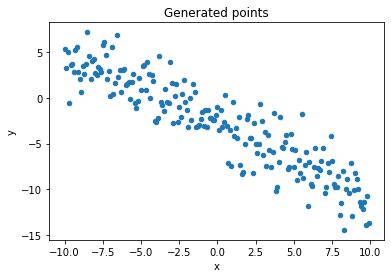

In [3]:
plt.title("Generated points")
plt.scatter(x, y, s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Functions that calculates errors and gradients:

In [4]:
def MSE(y_target, y_predicted): # mean square error
    assert len(y_target) == len(y_predicted)
    return sum([(y1 - y2)**2 for y1, y2 in zip(y_target, y_predicted)])

def b_grad(y_target, y_predicted):
    assert len(y_target) == len(y_predicted)
    return -2 * sum([(y1 - y2) for y1, y2 in zip(y_target, y_predicted)])

def k_grad(y_target, y_predicted, x):
    assert len(y_target) == len(y_predicted)
    assert len(y_target) == len(x)
    return -2 * sum([x1 * (y1 - y2) for y1, y2, x1 in zip(y_target, y_predicted, x)])

Finding the target regression line using gradient descent:

In [5]:
save_step = 100
epoсhs = 50000
alpha = 0.000005
stop_diff = 0.001

b_array = []
k_array = []
errors = [math.inf]
b_pred = np.random.uniform(-10, 10)
k_pred = np.random.uniform(-10, 10)

for i in range(epoсhs):
    y_predicted = [k_pred * i + b_pred for i in x]
    error = MSE(y, y_predicted)
    errors.append(error)
    if abs(error - errors[-2]) < stop_diff:
        break
    b_pred -= alpha * b_grad(y, y_predicted)
    k_pred -= alpha * k_grad(y, y_predicted, x)
    if i % 100 == 30:
        b_array.append(b_pred)
        k_array.append(k_pred)
        
b_array.append(b_pred)
k_array.append(k_pred)
k_pred = round(k_pred, 2)
b_pred = round(b_pred, 2)
print("Predicted k:", k_pred, "\nPredicted b:", b_pred)
#print("Saved temporary points:", len(b_array))

Predicted k: -0.8 
Predicted b: -2.82


Showing the result line:

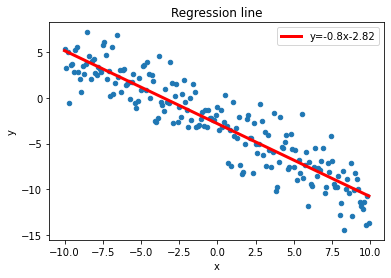

In [6]:
plt.scatter(x, y, s=20)
plt.title("Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, [k_pred * i + b_pred for i in x], "r", linewidth=3, label="y="+str(k_pred)+"x{:+}".format(b_pred))
plt.legend()
plt.show()

Creating animation of finding the target line:

In [7]:
animation_time = 3000 # ms

def animate(j):
    line.set_data(x, [k_array[j] * i + b_array[j] for i in x])
    
fig, ax = plt.subplots()
plt.scatter(x, y, s=20)
plt.title("Regression line")
plt.xlabel("x")
plt.ylabel("y")
line, = ax.plot(x, [k_array[0] * i + b_array[0] for i in x], "r", linewidth=3)

ani = animation.FuncAnimation(fig, animate, frames=range(0, len(b_array)), interval=animation_time/len(b_array), repeat=True)
plt.close()
HTML(ani.to_html5_video())